[Adapted from]( https://github.com/hadrienj/deepLearningBook-Notes)



In this notebook we cover some basics of Linear Algebra as seen in [Deep Learning](https://www.deeplearningbook.org/contents/linear_algebra.html) Book with a focus on using numpy

# 1. Scalars & Vectors
* Scalar is a single number, denoted as $x$
* Vector is an array of scalars, denoted by $\boldsymbol{x}$
    Thus, a vector has $n$ scalars $x_1, x_2 \cdots x_n$
    Note that indexing here begins with 1, unlike python (where it begins with 0)
    $$
    \boldsymbol{x} =\begin{bmatrix}
        x_1 \\
        x_2 \\
        \cdots \\
        x_n
    \end{bmatrix}
    $$
    Let us now look how we can create an array using numpy

In [2]:
import numpy as np


x=np.array([[4],[5],[6]])


print(x)
print(x.shape)

[[4]
 [5]
 [6]]
(3, 1)


# 2. Matrices & Tensors
Matrix is a 2D array of scalars, denoted by $\boldsymbol{X}$$$
\boldsymbol{X}=
\begin{bmatrix}
  X_{1,1} &amp; X_{1,2} &amp; \cdots &amp; X_{1,n} \\\\
  X_{2,1} &amp; X_{2,2} &amp; \cdots &amp; X_{2,n} \\\\
  \cdots &amp; \cdots &amp; \cdots &amp; \cdots \\\\
  X_{m,1} &amp; X_{m,2} &amp; \cdots &amp; X_{m,n}
\end{bmatrix}
$$

This matrix has $m$ rows and $n$ columns
Each indvidual element such as $X_{1,1}$ is a scalar
If $m = n$, the matrix is known as Square Matrix
Tensor is an array with more than 2 axes, denoted as X
Think of Tensor as a generalization of an array with more than 2 axes

In [5]:
X=np.random.randint(1,20,size=(3,4))
print(X)
X.shape

[[ 6  8 15  5]
 [14  2  9 18]
 [13  2 15 11]]


(3, 4)

In [6]:
X=X.reshape(2,6)
print(X)
X.shape

[[ 6  8 15  5 14  2]
 [ 9 18 13  2 15 11]]


(2, 6)

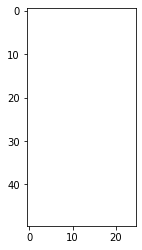

In [10]:
T = np.zeros((50,25,3),dtype='uint8')
T[ : , : ,:] = 255 #if we make it 0 we will see a image of black
#if third channel is 0 then R ,1->G,2->B   T[ : , : ,this_channel]

import matplotlib.pyplot as plt

plt.imshow(T)
plt.show()

# 3. Transpose
For a 2D matrix transpose can be obtained as follows $(A^T)_{i,j} = A_{j, i}$

For a vector, transpose makes the column vector into a row. Thus a column vector can also be represented as $\boldsymbol{x} = [x_1, x_2, x_3]^T$

In [18]:
print(T.shape)
x=T.T
# plt.imshow(T.T) we cant display it 
print(x.shape)
c=x.T
print(c.shape) #it just reverse it 

(50, 25, 3)
(3, 25, 50)
(50, 25, 3)


In [19]:
#we can also use Numpy transpose function
X = X.reshape((3,4))
print(X)

print(X.T)

[[ 6  8 15  5]
 [14  2  9 18]
 [13  2 15 11]]
[[ 6 14 13]
 [ 8  2  2]
 [15  9 15]
 [ 5 18 11]]


In [20]:
# Transpose of Tensor
T.shape

#print(T[0][0])
print(T.shape)
T1 = np.transpose(T,axes=(2,0,1)) 
#here we can use parameter axes to tell what we want to change
print(T1.shape)

print(T[0][0].shape)
print(T1[0][0].shape)

(50, 25, 3)
(3, 50, 25)
(3,)
(25,)


# 4. Broadcasting
You can add a scalar to a vector, and numpy will add it to each element in the vector

$\boldsymbol{x} + a = \boldsymbol{x}_i + a$


Similarly you can add a vector to a matrix, and numpy will add the vector to each column of the matrix

In [21]:
x = np.array([1,2,3,4]) 
print(x)
print(x+4) 

[1 2 3 4]
[5 6 7 8]


In [22]:
X = np.array([[10,20,30,40],
             [40,50,60,70]]) 

print(X)
print(X + x)

[[10 20 30 40]
 [40 50 60 70]]
[[11 22 33 44]
 [41 52 63 74]]


# 5. Matrix Multiplication
This is perhaps one operation that you would use quite frequently in any ML/DL model. You should remember a few things about multiplication

$\boldsymbol{C} = \boldsymbol{A} \boldsymbol{B}$ is only defined when the second dimension of $\boldsymbol{A}$ matches the first dimension of $\boldsymbol{B}$
Further, if $\boldsymbol{A}$ is of shape (m, n) and $\boldsymbol{B}$ of shape (n, p), then $\boldsymbol{C}$ is of shape (m, p)
This operation is concretely defined as $C_{i,j} = \sum_k A_{i, k} B_{k, j}$

$\boldsymbol{C}_{i, j}$ is computed by taking the dot product of $i$-th row of $\boldsymbol{A}$ with $j$-th column of $\boldsymbol{B}$
A more useful method to think of matrix multiplcation is as linear combination of columns of $\boldsymbol{A}$ weighted by column entries of $\boldsymbol{B}$
Matrix Multiplication

Matrix Multiplication. Image Credit: https://www.mpcm.org/visualizing-matrix-multiplication-as-a-linear-combination-eli-benderskys-website/

In [3]:

A = np.array([[1,2],
              [3,4]])

B = np.array([[0,2],
              [3,2]])

C = np.dot(A,B)
print(C)

[[ 6  6]
 [12 14]]


# 6. Element Wise multiplication: Hadamard product
Element wise multiplication $\boldsymbol{A} \odot \boldsymbol{B}$

Notice how numpy uses the * for this. Important to be careful, and not to confuse this with matrix multiplication

In [5]:
A = np.array([[1,2],
              [3,4]])

B = np.array([[0,2],
              [3,2]])

A*B

array([[0, 4],
       [9, 8]])

# 7. Norms
Norm can be thought of as a proxy for size of a vector.

We define $L^p$ norm $\Vert \boldsymbol{x}\Vert _p = (\sum |\boldsymbol{x}_i|^{p})^{\frac{1}{p}}$

$p \ge 1, p \in \Re$

Norm is a function that maps vectors to non-negative values. A norm satisfies the following properties:
$f(\boldsymbol{x}) = 0 =&gt;  \boldsymbol{x} = 0$
$f(\boldsymbol{x} + \boldsymbol{y}) \le f(\boldsymbol{x}) + f(\boldsymbol{y})$ (Triangle inequality)
$\forall \ \alpha \in \Re, \ f(\alpha \ \boldsymbol{x}) = |\alpha|\ f(\boldsymbol{x})$
$L^2$ norm is called the Euclidean norm, often $\Vert \boldsymbol{x} \Vert$

We work mostly with squared $L^2$ norm which can be computed as $\boldsymbol{x}^T \boldsymbol{x}$

Squared $L^2$ norm is easier to work with as its derivative is $2 * \boldsymbol{x}$

In some ML applications it is important to distinguish between elements that are zero and small but zero. Squared $L^2$ norm may not be the right choice as it grows very slowly near the origin

$L^1$ norm is the absolute sum of all members of a vector

Useful when difference between 0 and non-zero elements is essential.
Max-Norm: $L^\infty$: This simplifies to absoute value of the element with highest magnitude

In [7]:
x = np.array([-3,4])

lp2 = np.linalg.norm(x)
print(lp2)

lp1 = np.linalg.norm(x,ord=1)
print(lp1)

lpinf = np.linalg.norm(x,ord=np.inf)
print(lpinf)

5.0
7.0
4.0


# 7. Norms
Norm can be thought of as a proxy for size of a vector.

We define $L^p$ norm $\Vert \boldsymbol{x}\Vert _p = (\sum |\boldsymbol{x}_i|^{p})^{\frac{1}{p}}$

$p \ge 1, p \in \Re$

Norm is a function that maps vectors to non-negative values. A norm satisfies the following properties:
$f(\boldsymbol{x}) = 0 =&gt;  \boldsymbol{x} = 0$
$f(\boldsymbol{x} + \boldsymbol{y}) \le f(\boldsymbol{x}) + f(\boldsymbol{y})$ (Triangle inequality)
$\forall \ \alpha \in \Re, \ f(\alpha \ \boldsymbol{x}) = |\alpha|\ f(\boldsymbol{x})$
$L^2$ norm is called the Euclidean norm, often $\Vert \boldsymbol{x} \Vert$

We work mostly with squared $L^2$ norm which can be computed as $\boldsymbol{x}^T \boldsymbol{x}$

Squared $L^2$ norm is easier to work with as its derivative is $2 * \boldsymbol{x}$

In some ML applications it is important to distinguish between elements that are zero and small but zero. Squared $L^2$ norm may not be the right choice as it grows very slowly near the origin

$L^1$ norm is the absolute sum of all members of a vector

Useful when difference between 0 and non-zero elements is essential.
Max-Norm: $L^\infty$: This simplifies to absoute value of the element with highest magnitude

https://numpy.org/doc/stable/reference/routines.linalg.html

In [8]:
x = np.array([-3,4])
lp2 = np.linalg.norm(x)
print(lp2)

lp1 = np.linalg.norm(x,ord=1)
print(lp1)

lpinf = np.linalg.norm(x,ord=np.inf)
print(lpinf)

5.0
7.0
4.0


# 8. Determinants
More Operations on Matrices - https://numpy.org/doc/stable/reference/routines.linalg.html

In [13]:
A = np.array([[1,2],
              [3,4]])


np.linalg.det(A)

-2.0000000000000004

# 9. Inverse

In [12]:
A = np.array([[1,2],
              [3,4]])
Ainv = np.linalg.inv(A)

print(Ainv)

          
pinv = np.linalg.pinv(A)
print(pinv)

[[-2.   1. ]
 [ 1.5 -0.5]]
[[-2.   1. ]
 [ 1.5 -0.5]]


# 10. Solve a System of Equations
https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html#numpy.linalg.solve

In [14]:
a = np.array([[2,3], [3,1]])
b = np.array([8,5])

In [15]:
np.linalg.solve(a,b)


array([1., 2.])

[see this](https://github.com/coding-blocks-archives/machine-learning-online-2018/blob/master/2.%20Working%20with%20Libraries/linear_algebra-start.ipynb)